In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
import lightgbm
import xgboost
from yellowbrick.model_selection import LearningCurve

In [104]:
train = pd.read_csv('/content/train_data.csv')
test = pd.read_csv('/content/test_data.csv')
train = train.drop(['case_id'], axis=1)
test = test.drop(['case_id'], axis=1)
train['dataset'] = 'train'
test['dataset'] = 'test'
df = pd.concat([train, test])

In [9]:
df.head()

Hospital_code Hospital_type_code  ...   Stay dataset
0              8                  c  ...   0-10   train
1              2                  c  ...  41-50   train
2             10                  e  ...  31-40   train
3             26                  b  ...  41-50   train
4             26                  b  ...  41-50   train

[5 rows x 18 columns]

In [105]:
ds = df.groupby(['Hospital_code', 'dataset'])['patientid'].count().reset_index()
ds.columns = ['hospital', 'dataset', 'count']
fig = px.bar(
    ds, 
    x='hospital', 
    y="count", 
    color = 'dataset',
    barmode='group',
    orientation='v', 
    title='Cases per hospital distribution', 
    width=900,
    height=700
)
fig.show()

In [16]:
ds = df.groupby(['Hospital_type_code', 'dataset'])['patientid'].count().reset_index()
ds.columns = ['hospital', 'dataset', 'count']
fig = px.bar(
    ds, 
    x='hospital', 
    y="count", 
    color = 'dataset',
    barmode='group',
    orientation='v', 
    title='Cases hospital type distribution', 
    width=900,
    height=600
)
fig.show()

In [17]:
ds = df.groupby(['Hospital_region_code', 'dataset'])['patientid'].count().reset_index()
ds.columns = ['hospital', 'dataset', 'count']
fig = px.bar(
    ds, 
    x='hospital', 
    y="count", 
    color = 'dataset',
    barmode='group',
    orientation='v', 
    title='Cases hospital region distribution', 
    width=900,
    height=600
)
fig.show()

In [18]:
ds = df.groupby(['Department', 'dataset'])['patientid'].count().reset_index()
ds.columns = ['department', 'dataset', 'count']
fig = px.bar(
    ds, 
    x='department', 
    y="count", 
    color = 'dataset',
    barmode='group',
    orientation='v', 
    title='Department distribution', 
    width=900,
    height=600
)
fig.show()

In [19]:
ds = df.groupby(['Ward_Type', 'dataset'])['patientid'].count().reset_index()
ds.columns = ['Ward_Type', 'dataset', 'count']
fig = px.bar(
    ds, 
    x='Ward_Type', 
    y="count", 
    color = 'dataset',
    barmode='group',
    orientation='v', 
    title='Ward Type distribution', 
    width=900,
    height=600
)
fig.show()

In [20]:
ds = ds[ds['dataset']=='train']
fig = px.pie(
    ds, 
    names='Ward_Type', 
    values="count", 
    title='Ward type pie chart for train set', 
    width=900,
    height=600
)
fig.show()

In [21]:
ds = df.groupby(['Ward_Facility_Code', 'dataset'])['patientid'].count().reset_index()
ds.columns = ['Ward_Facility_Code', 'dataset', 'count']
fig = px.bar(
    ds, 
    x='Ward_Facility_Code', 
    y="count", 
    color = 'dataset',
    barmode='group',
    orientation='v', 
    title='Ward Facility Code distribution', 
    width=900,
    height=600
)
fig.show()

In [22]:
ds = df.groupby(['Age', 'dataset'])['patientid'].count().reset_index()
ds.columns = ['age', 'dataset', 'count']
fig = px.bar(
    ds, 
    x='age', 
    y="count", 
    color = 'dataset',
    barmode='group',
    orientation='v', 
    title='Age distribution', 
    width=900,
    height=600
)
fig.show()

In [23]:
ds = df.groupby(['Type of Admission', 'dataset'])['patientid'].count().reset_index()
ds.columns = ['admission', 'dataset', 'count']
fig = px.bar(
    ds, 
    x='admission', 
    y="count", 
    color = 'dataset',
    barmode='group',
    orientation='v', 
    title='Admission type distribution', 
    width=900,
    height=600
)
fig.show()

In [24]:
ds = df.groupby(['Stay', 'dataset'])['patientid'].count().reset_index()
ds.columns = ['Stay', 'dataset', 'count']
fig = px.bar(
    ds, 
    x='Stay', 
    y="count", 
    color = 'dataset',
    barmode='group',
    orientation='v', 
    title='Stay length distribution', 
    width=900,
    height=600
)
fig.show()

In [27]:
data = df['patientid'].value_counts().reset_index()
data.columns = ['patientid', 'cases']
data['patientid'] = 'patient ' + data['patientid'].astype(str)
data = data.sort_values('cases')
fig = px.bar(
    data.tail(50), 
    x="cases", 
    y="patientid", 
    orientation='h', 
    title='Top 50 patients',
    width=1000,
    height=1000
)
fig.show()

In [29]:
fig = px.histogram(
    df, 
    "Admission_Deposit", 
    nbins=50, 
    color = 'dataset',
    barmode='group',
    title='Admission Deposit destribution', 
    width=700,
    height=600
)
fig.show()

**Now Let's Start Modeling**

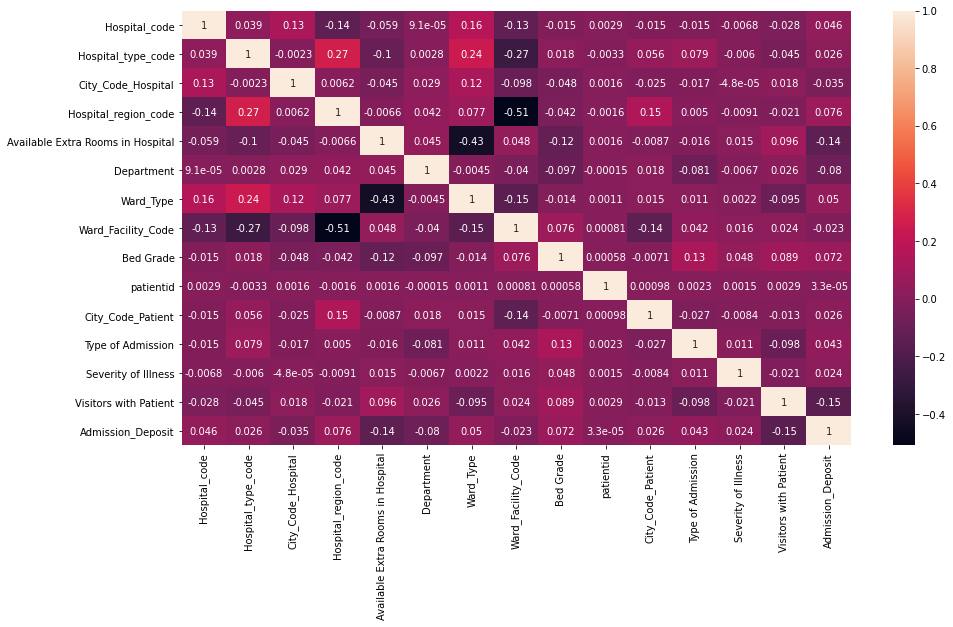

In [30]:
df.loc[df['Stay'] == '0-10', 'Stay'] = 0
df.loc[df['Stay'] == '11-20', 'Stay'] = 1
df.loc[df['Stay'] == '21-30', 'Stay'] = 2
df.loc[df['Stay'] == '31-40', 'Stay'] = 3
df.loc[df['Stay'] == '41-50', 'Stay'] = 4
df.loc[df['Stay'] == '51-60', 'Stay'] = 5
df.loc[df['Stay'] == '61-70', 'Stay'] = 6
df.loc[df['Stay'] == '71-80', 'Stay'] = 7
df.loc[df['Stay'] == '81-90', 'Stay'] = 8
df.loc[df['Stay'] == '91-100', 'Stay'] = 9
df.loc[df['Stay'] == 'More than 100 Days', 'Stay'] = 10

In [31]:
train = df[df['dataset']=='train']
test = df[df['dataset']=='test']

target = train['Stay']

features = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient', 'Admission_Deposit']

train = train[features]
train = train.fillna(0)
test = test[features]

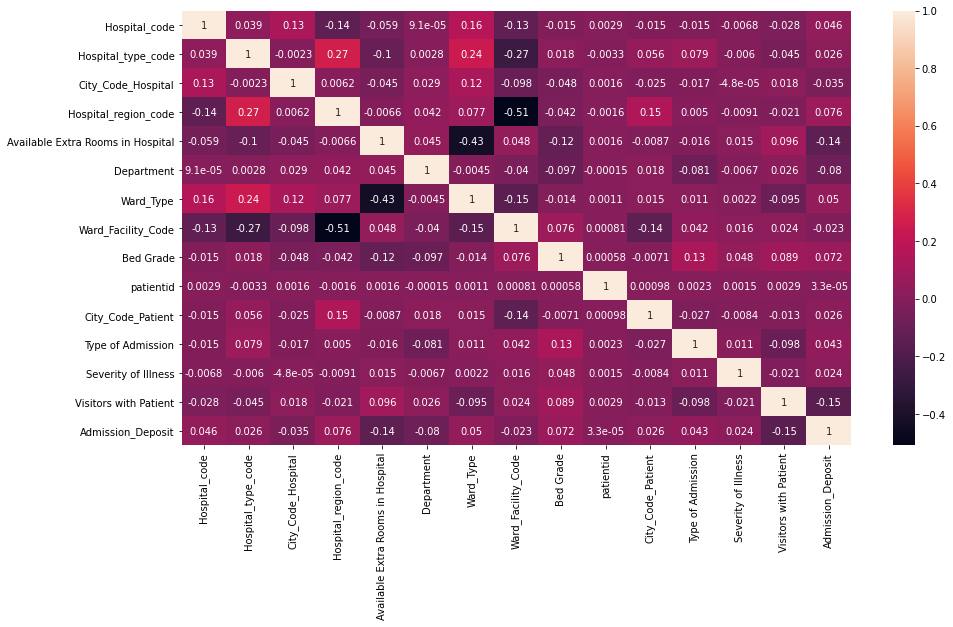

In [101]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)

In [34]:
X, X_val, y, y_val = train_test_split(train, target, random_state=0, test_size=0.2, shuffle=True)
y=y.astype('int')
y_val=y_val.astype('int')

In [38]:
model = LogisticRegression(random_state=42)
model.fit(X, y)
preds = model.predict(X_val)
print('accuracy: ', accuracy_score(y_val, preds)*100, '%')

accuracy:  35.02386634844869 %


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



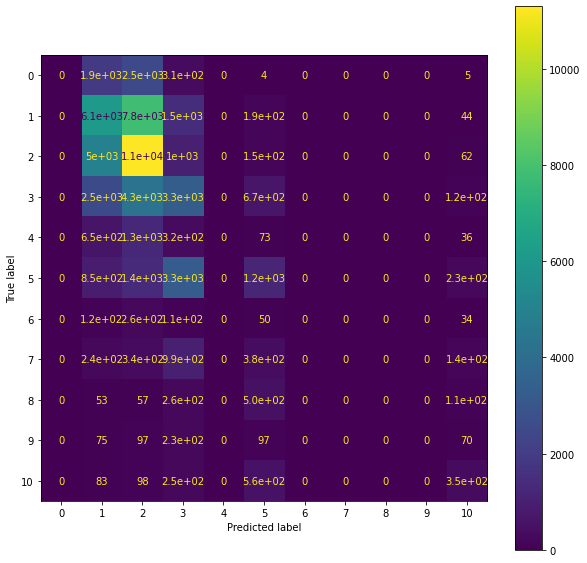

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_val, y_val, ax=ax)


In [106]:
need_to_encode = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness']
for column in need_to_encode:
    le = LabelEncoder()
    le.fit(df[column])
    df[column] = le.transform(df[column])

In [107]:
df.loc[df['Age'] == '0-10', 'Age'] = 0
df.loc[df['Age'] == '11-20', 'Age'] = 1
df.loc[df['Age'] == '21-30', 'Age'] = 2
df.loc[df['Age'] == '31-40', 'Age'] = 3
df.loc[df['Age'] == '41-50', 'Age'] = 4
df.loc[df['Age'] == '51-60', 'Age'] = 5
df.loc[df['Age'] == '61-70', 'Age'] = 6
df.loc[df['Age'] == '71-80', 'Age'] = 7
df.loc[df['Age'] == '81-90', 'Age'] = 8
df.loc[df['Age'] == '91-100', 'Age'] = 9

In [108]:
categorical = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 
              'City_Code_Patient', 'Type of Admission', 'Severity of Illness']

In [109]:
train = df[df['dataset']=='train']
test = df[df['dataset']=='test']

target = train['Stay']
train = train.fillna(0)
test = test.fillna(0)
train = train.drop(['patientid', 'dataset', 'Stay'], axis=1)
test = test.drop(['patientid', 'dataset'], axis=1)
train.head()

Hospital_code  Hospital_type_code  ...  Age  Admission_Deposit
0              8                   2  ...    5             4911.0
1              2                   2  ...    5             5954.0
2             10                   4  ...    5             4745.0
3             26                   1  ...    5             7272.0
4             26                   1  ...    5             5558.0

[5 rows x 15 columns]

In [113]:
X, X_val, y, y_val = train_test_split(train, target, random_state=0, test_size=0.2, shuffle=True)


In [114]:
model = lightgbm.LGBMClassifier(random_state=42)
model.fit(X, y)
preds = model.predict(X_val)
print('LGBM accuracy: ', accuracy_score(y_val, preds)*100, '%')

LGBM accuracy:  42.504082401708324 %


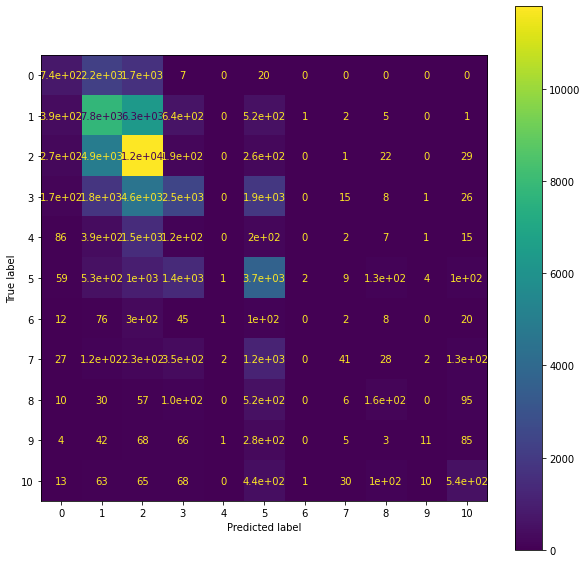

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_val, y_val, ax=ax)

In [72]:
df.loc[df['Stay'] == '0-10', 'Stay'] = 0
df.loc[df['Stay'] == '11-20', 'Stay'] = 1
df.loc[df['Stay'] == '21-30', 'Stay'] = 2
df.loc[df['Stay'] == '31-40', 'Stay'] = 3
df.loc[df['Stay'] == '41-50', 'Stay'] = 4
df.loc[df['Stay'] == '51-60', 'Stay'] = 5
df.loc[df['Stay'] == '61-70', 'Stay'] = 6
df.loc[df['Stay'] == '71-80', 'Stay'] = 7
df.loc[df['Stay'] == '81-90', 'Stay'] = 8
df.loc[df['Stay'] == '91-100', 'Stay'] = 9
df.loc[df['Stay'] == 'More than 100 Days', 'Stay'] = 10

In [74]:
train = df[df['dataset']=='train']
test = df[df['dataset']=='test']

target = train['Stay']

features = ['Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient', 'Admission_Deposit']

train = train[features]
train = train.fillna(0)
test = test[features]

In [75]:
X, X_val, y, y_val = train_test_split(train, target, random_state=0, test_size=0.2, shuffle=True)
y=y.astype('int')
y_val=y_val.astype('int')

In [77]:
model = xgboost.XGBClassifier(random_state=42)
model.fit(X, y)
preds = model.predict(X_val)
print('xgboost accuracy: ', accuracy_score(y_val, preds)*100, '%')

xgboost accuracy:  36.78872001004898 %


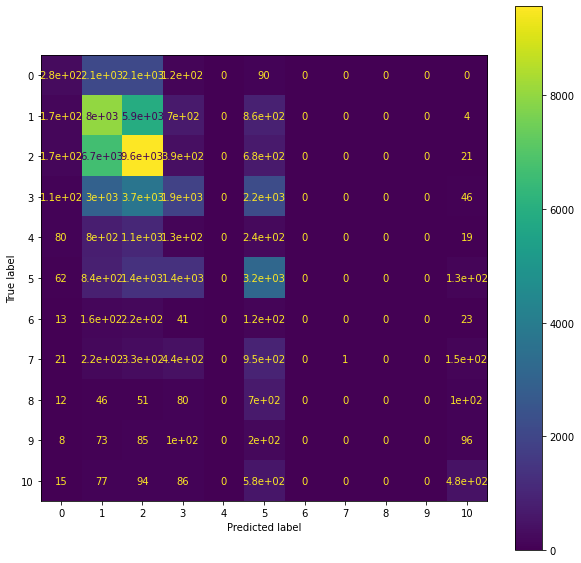

In [78]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_val, y_val, ax=ax)

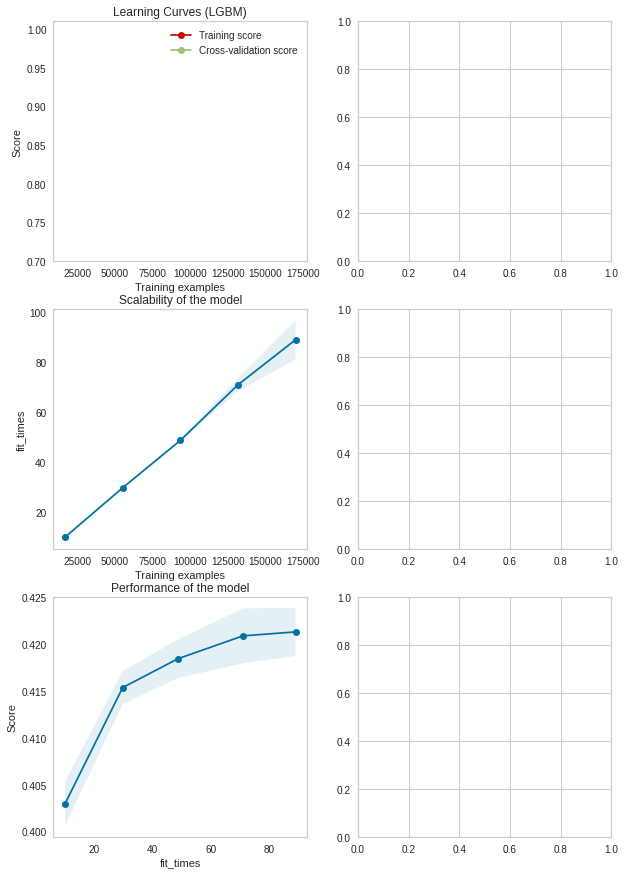

In [121]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (LGBM)"

estimator = model
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=3, n_jobs=4)



plt.show()